In [1]:
# Import
import os
import cv2
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Download Data
path = 'C:\\Users\\User\\Desktop\\pjj\\ImgData'

In [3]:
Label = []
numLabel = 2
for i in range(numLabel):
    subLabel = [0]*numLabel
    subLabel[i] = 1
    Label.append(subLabel)

In [4]:
Label

[[1, 0], [0, 1]]

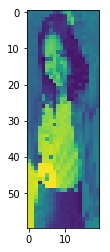

In [5]:
trainingData = []
for folder,dirs,files in os.walk(path):
    for file in files:
        pathImg = os.path.join(folder,file)
        #print(file) 
        img = cv2.imread(pathImg,cv2.IMREAD_GRAYSCALE)
        
        img = cv2.resize(img, (20, 60)) 
        #print(folder.split('\\'))
        if(folder.split('\\')[6] == 'People'):
            
            trainingData.append([img,Label[0]])
        else:
            trainingData.append([img,Label[1]])
            
shuffle(trainingData)
#plt.imshow(img)

In [6]:
trainSize = len(trainingData) * 20 // 100
train = trainingData[:-trainSize]
test = trainingData[-trainSize:]

In [7]:
ImgTest = np.array([i[0] for i in test]).reshape(-1, 20 * 60) / 255
CatTest = [i[1] for i in test]
ImgTrain = np.array([i[0] for i in train]).reshape(-1, 20 * 60) / 255
CatTrain = [i[1] for i in train]

In [8]:
print(np.shape(ImgTest))

(400, 1200)


In [9]:
def get_batch_train():
    
    arr = range(748)
    trainData = np.random.permutation(len(arr))
    batch = []
    cat = []
    
    for i in range(500):
        batch.append(ImgTrain[trainData[i]])
        cat.append(CatTrain[trainData[i]])
        
    return batch,cat

In [10]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x,W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1, 2, 2, 1], padding='SAME')

x = tf.placeholder(tf.float32, shape=[None, 1200])
y_ = tf.placeholder(tf.float32, shape=[None, 2])
sess = tf.InteractiveSession()

W = tf.Variable(tf.zeros([1200,2]))

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1, 20, 60, 1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([5 * 15 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 5 * 15 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 2])
b_fc2 = bias_variable([2])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.arg_max(y_conv,1), tf.arg_max(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Instructions for updating:
Use `argmax` instead


In [11]:
for i in range(500):
    
    train_x,train_y = get_batch_train()
    
    if i%1 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x: train_x, y_: train_y, keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
        
    train_step.run(feed_dict={x: train_x, y_: train_y, keep_prob: 0.5})
    
save_path = saver.save(sess, "C:/Users/User/Desktop/pjj/Model/model_20_60.ckpt")
print("Model saved in file: ", save_path)
    

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: ImgTest, y_: CatTest, keep_prob: 1.0}))

step 0, training accuracy 0.48
step 1, training accuracy 0.518
step 2, training accuracy 0.496
step 3, training accuracy 0.498
step 4, training accuracy 0.478
step 5, training accuracy 0.478
step 6, training accuracy 0.488
step 7, training accuracy 0.582
step 8, training accuracy 0.574
step 9, training accuracy 0.546
step 10, training accuracy 0.502
step 11, training accuracy 0.524
step 12, training accuracy 0.582
step 13, training accuracy 0.692
step 14, training accuracy 0.774
step 15, training accuracy 0.716
step 16, training accuracy 0.676
step 17, training accuracy 0.668
step 18, training accuracy 0.72
step 19, training accuracy 0.738
step 20, training accuracy 0.726
step 21, training accuracy 0.76
step 22, training accuracy 0.794
step 23, training accuracy 0.774
step 24, training accuracy 0.778
step 25, training accuracy 0.782
step 26, training accuracy 0.786
step 27, training accuracy 0.778
step 28, training accuracy 0.794
step 29, training accuracy 0.764
step 30, training accur

step 246, training accuracy 0.992
step 247, training accuracy 0.988
step 248, training accuracy 0.99
step 249, training accuracy 0.988
step 250, training accuracy 0.98
step 251, training accuracy 0.99
step 252, training accuracy 0.992
step 253, training accuracy 0.99
step 254, training accuracy 0.984
step 255, training accuracy 0.992
step 256, training accuracy 0.986
step 257, training accuracy 0.992
step 258, training accuracy 0.992
step 259, training accuracy 0.992
step 260, training accuracy 0.994
step 261, training accuracy 0.986
step 262, training accuracy 0.99
step 263, training accuracy 0.994
step 264, training accuracy 0.99
step 265, training accuracy 0.988
step 266, training accuracy 0.992
step 267, training accuracy 0.992
step 268, training accuracy 0.99
step 269, training accuracy 0.992
step 270, training accuracy 0.99
step 271, training accuracy 0.99
step 272, training accuracy 0.994
step 273, training accuracy 0.998
step 274, training accuracy 0.994
step 275, training accu

test accuracy 0.9
